(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/
Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\
%29 . The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity.1 Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13,
vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data.

In [1]:
import pandas as pd

def read_activity_to_df(train_or_test:pd.DataFrame, activity_list:list, data_set_start:int, data_set_end:int, type:str):
    for activity in activity_list:
        for i in range(data_set_start,data_set_end+1):
            # print('loading activity:', activity, ' dataset:', i, ' to:', type)
            if activity=='bending2' and i==4: sep_=' '
            else:sep_=','
            df = pd.read_csv('../data/Homework 3 Data/AReM/'+activity+'/dataset'+str(i)+'.csv', comment='#', names=column_names, sep=sep_, index_col=False)
            df['activity'] = activity
            train_or_test = train_or_test.append(df, ignore_index=True)
    return train_or_test

column_names = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
activity_list1 = ['bending1', 'bending2']
activity_list2 = ['cycling', 'lying', 'sitting', 'standing', 'walking']

train = pd.DataFrame(columns=column_names)
test = pd.DataFrame(columns=column_names)

test = read_activity_to_df(test, activity_list1, 1, 2, 'testset')
test = read_activity_to_df(test, activity_list2, 1, 3, 'testset')

train = read_activity_to_df(train, activity_list2, 4, 15, 'trainset')
train = read_activity_to_df(train, activity_list1[:-1], 3, 7, 'trainset')
train = read_activity_to_df(train, activity_list1[-1:], 3, 6, 'trainset')

# test

In [2]:
# train

(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this
problem, we focus on time-domain features.
i. Research what types of time-domain features are usually used in time series
classification and list them (examples are minimum, maximum, mean, etc).

# time-domain features types are minimum, maximum, mean, third_quartile, 1st quart, 3rd quart.

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them
directly.2

In [3]:
import numpy as np
def count_features_n(ans:pd.DataFrame, activity:str, id:int, is_bending:bool, n:int=1, select_li:list=[1]*7):
    # use select_li to select 3 time domain features: [mean, std, min, first_quatile, median, third_quartile, max]
    # [1,0,0,0,0,1,1]
    if activity=='bending2' and id==4: sep_=' '
    else:sep_=','
    df_ = pd.read_csv('../data/Homework 3 Data/AReM/'+activity+'/dataset'+str(id)+'.csv', comment='#', names=column_names, sep=sep_, index_col=False)
    df_.fillna(0, inplace=True)

    dflist = np.array_split(df_, n)
    
    i=1
    feature_row = pd.DataFrame(index=[0])
    for df in dflist:
        describe = df.describe()
        # print(describe)
        for attr, row in describe.iteritems():
            if attr=='time': continue
            if select_li[0]:
                mean = describe[attr][1]
                feature_row['mean'+str(i)] = mean
            if select_li[1]:
                std = describe[attr][2]
                feature_row['std'+str(i)] = std
            if select_li[2]:
                min_ = describe[attr][3]
                feature_row['min'+str(i)] = min_
            if select_li[3]:
                first_quartile = describe[attr][4]
                feature_row['first_quartile'+str(i)] = first_quartile
            if select_li[4]:
                median = describe[attr][5]
                feature_row['median'+str(i)] = median
            if select_li[5]:
                third_quartile = describe[attr][6]
                feature_row['third_quartile'+str(i)] = third_quartile
            if select_li[6]:
                max_ = describe[attr][7]
                feature_row['max'+str(i)] = max_
            if is_bending:
                feature_row['class'] = 1
            else:
                feature_row['class'] = 0
            i+=1
    ans = ans.append(feature_row, ignore_index=True)
        # print(feature_row)
    return ans


def get_features_split_n(type:str='all', N:int=1, normalize:bool=False, select_li:list=[1]*7):
    rlt_n = pd.DataFrame()
    if type=='all':
        for i in range(1, 8):
            rlt_n = count_features_n(rlt_n, activity='bending1', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 7):
            rlt_n = count_features_n(rlt_n, activity='bending2', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 16):
            for activity in activity_list2:
                rlt_n = count_features_n(rlt_n, activity=activity, id = i, is_bending=False,n=N, select_li=select_li)
    elif type=='test':
        for i in range(1, 3):
            rlt_n = count_features_n(rlt_n, activity='bending1', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 3):
            rlt_n = count_features_n(rlt_n, activity='bending2', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 4):
            for activity in activity_list2:
                rlt_n = count_features_n(rlt_n, activity=activity, id = i, is_bending=False,n=N, select_li=select_li)
    elif type=='train':
        for i in range(3, 8):
            rlt_n = count_features_n(rlt_n, activity='bending1', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(3, 7):
            rlt_n = count_features_n(rlt_n, activity='bending2', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(4, 16):
            for activity in activity_list2:
                rlt_n = count_features_n(rlt_n, activity=activity, id = i, is_bending=False,n=N, select_li=select_li)
    
    if normalize:
        for item in list(rlt_n):
            if item=='class':
                break
            max_tmp=np.max(np.array(rlt_n[item]))
            min_tmp=np.min(np.array(rlt_n[item]))
            if (max_tmp!=min_tmp):
                rlt_n[item]=rlt_n[item].apply(lambda x:(x-min_tmp)/(max_tmp-min_tmp))

    return rlt_n

# selected_features_list=[1,0,0,0,0,1,1]
# features = get_features_split_n(N=2, select_li=selected_features_list)
features = get_features_split_n()
features

,mean1,std1,min1,first_quartile1,median1,third_quartile1,max1,class,mean2,std2,...,median5,third_quartile5,max5,mean6,std6,min6,first_quartile6,median6,third_quartile6,max6
0,40.624792,1.476967,37.25,39.2500,40.50,42.00,45.00,1,0.358604,0.322605,...,35.00,36.00,38.25,0.570583,0.582915,0.00,0.00,0.43,1.300,1.92
1,42.812812,1.435550,38.00,42.0000,42.50,43.67,45.67,1,0.372438,0.289158,...,33.00,34.50,38.50,0.571083,0.601010,0.00,0.00,0.43,1.300,3.11
2,43.954500,1.558835,35.00,43.0000,44.33,45.00,47.40,1,0.426250,0.338690,...,36.00,36.50,38.50,0.493292,0.513506,0.00,0.00,0.43,0.940,1.79
3,42.179813,3.670666,33.00,39.1500,43.50,45.00,47.75,1,0.696042,0.630860,...,35.00,36.33,38.67,0.613521,0.524317,0.00,0.00,0.50,1.000,2.18
4,41.678063,2.243490,33.00,41.3300,41.75,42.75,45.75,1,0.535979,0.405469,...,30.00,31.25,37.50,0.383292,0.389164,0.00,0.00,0.43,0.500,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,37.177042,3.581301,24.25,34.5000,36.25,40.25,45.00,0,2.374208,1.601799,...,20.00,21.75,25.50,2.921729,1.852600,0.00,1.50,2.50,3.900,9.34
84,27.716375,1.442253,23.50,27.0000,27.50,29.00,30.00,0,0.363688,0.394817,...,8.75,10.75,21.00,0.734271,0.613688,0.00,0.43,0.71,1.000,4.50
85,42.728854,2.046362,29.25,41.3300,43.25,44.50,46.00,0,0.555333,0.382544,...,17.67,19.00,24.00,0.892083,0.851175,0.00,0.43,0.71,1.220,5.10
86,44.441187,2.417797,36.00,44.6275,45.00,45.75,47.33,0,0.346604,0.358113,...,12.75,14.67,21.00,1.155083,0.842087,0.00,0.50,0.94,1.500,5.91


In [4]:
# features.isnull().any()

iii. Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootsrap confidence interval for the standard deviation
of each feature.

In [5]:
import math

def average(data):
    return sum(data) / len(data)

def std(data):
    return np.std(data)

def bootstrap(data, s, c, func):
    """
    计算bootstrap置信区间
    :param data: array 保存样本数据
    :param s: Sampling times 通常B>=1000
    :param c: Confidence level
    :param func: 样本估计量
    :return: bootstrap置信区间上下限
    """
    array = np.array(data)
    n = len(array)
    sample_result_arr = []
    # print(n)
    for i in range(s):
        index_arr = np.random.randint(0, n, size=n)
        # print(len(index_arr))
        data_sample = array[index_arr]
        sample_result = func(data_sample)
        sample_result_arr.append(sample_result)

    a = 1 - c
    k1 = int(s * a / 2)
    k2 = int(s * (1 - a / 2))
    # print(k1,k2,len(sample_result_arr))
    auc_sample_arr_sorted = sorted(sample_result_arr)
    lower = auc_sample_arr_sorted[k1]
    higher = auc_sample_arr_sorted[k2]
    # print(auc_sample_arr_sorted[k2], math.isnan(auc_sample_arr_sorted[k2]))

    return lower, higher


time_domain_feature_li = ['mean','std','min','first_quartile','median','third_quartile','max']
intervals={}
for time_domain in time_domain_feature_li:
    for i in range(1,7):
        feature_name = time_domain+str(i)
        # print(feature_name)
        input = features[feature_name]
        std_=std(input)
        conf = bootstrap(input, 1000, 0.9, std)
        intervals[feature_name]=[std_, conf]
        print(feature_name, ':  std is:', std_, ', 90 percent confidence interval for the std is:', conf)

mean1 :  std is: 5.305314461239687 , 90 percent confidence interval for the std is: (4.675998430810394, 5.854126625118335)
mean2 :  std is: 1.5651942520745659 , 90 percent confidence interval for the std is: (1.371825931247713, 1.6953541596337758)
mean3 :  std is: 3.985540173028039 , 90 percent confidence interval for the std is: (3.375923269355136, 4.4650282458245005)
mean4 :  std is: 1.1594695120976577 , 90 percent confidence interval for the std is: (1.0685623186589752, 1.2159952671205172)
mean5 :  std is: 5.643253378646846 , 90 percent confidence interval for the std is: (4.339151782439919, 6.726725714037605)
mean6 :  std is: 1.1482317454684936 , 90 percent confidence interval for the std is: (1.0483687339149423, 1.2065643256160707)
std1 :  std is: 1.7620555751491023 , 90 percent confidence interval for the std is: (1.5561868882388175, 1.9467460529932936)
std2 :  std is: 0.8790677991268443 , 90 percent confidence interval for the std is: (0.7925065250256851, 0.9356726596569234)
std

iv. Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max).

In [6]:
import warnings
from itertools import compress
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

warnings.filterwarnings("ignore")
data = get_features_split_n(normalize=True)
y_train = data['class']
x_train = data.drop(['class'], axis=1)
logreg = LogisticRegression()
rfe_res = RFE(estimator=logreg, n_features_to_select= 3)
rfe_res.fit(x_train, y_train)
best_features = list(compress(x_train.columns.tolist(),rfe_res.support_))
print(best_features)
#  use select_li to select 3 time domain features: [mean, std, min, first_quatile, median, third_quartile, max]
#  [1,0,0,0,0,1,1]
selected_features_list=[1,0,0,0,0,1,1]

['mean1', 'third_quartile4', 'max5']


# By using feature selection method, I chose:
1. mean
2. third_quartile
3. max

(d) Binary Classification Using Logistic Regression3
i. Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. (See
p. 129 of the textbook).4

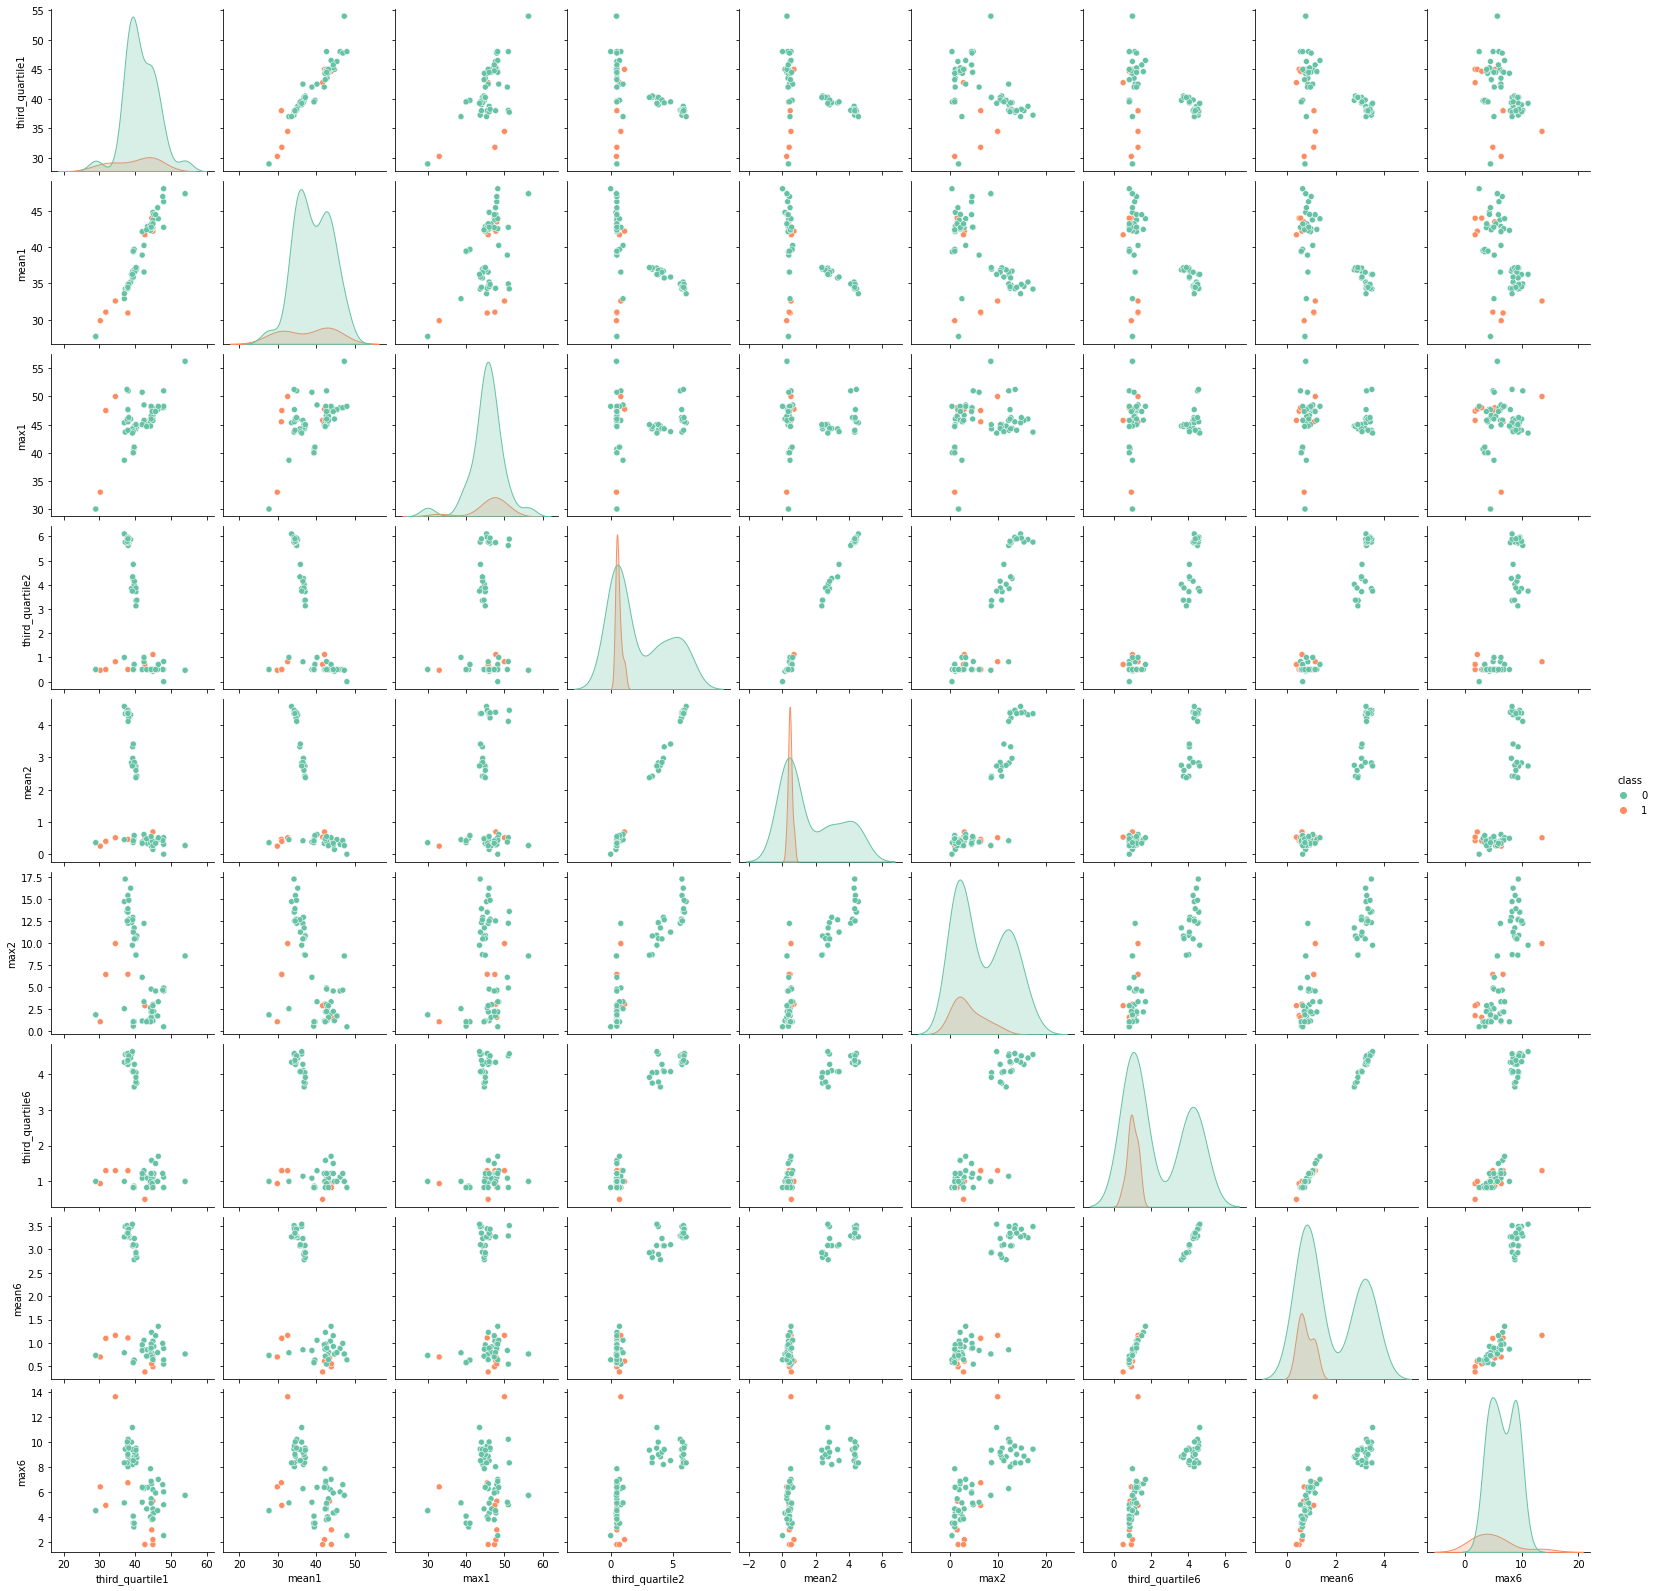

In [7]:
import seaborn as sns
features = get_features_split_n(type='train', select_li=selected_features_list)
plot = sns.pairplot(data=features, vars=['third_quartile1','mean1','max1',
'third_quartile2','mean2','max2',
'third_quartile6','mean6','max6'], kind='scatter', palette="Set2",hue='class')

ii. Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 1(d)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 12. Do you see any considerable difference
in the results with those of 1(d)i?

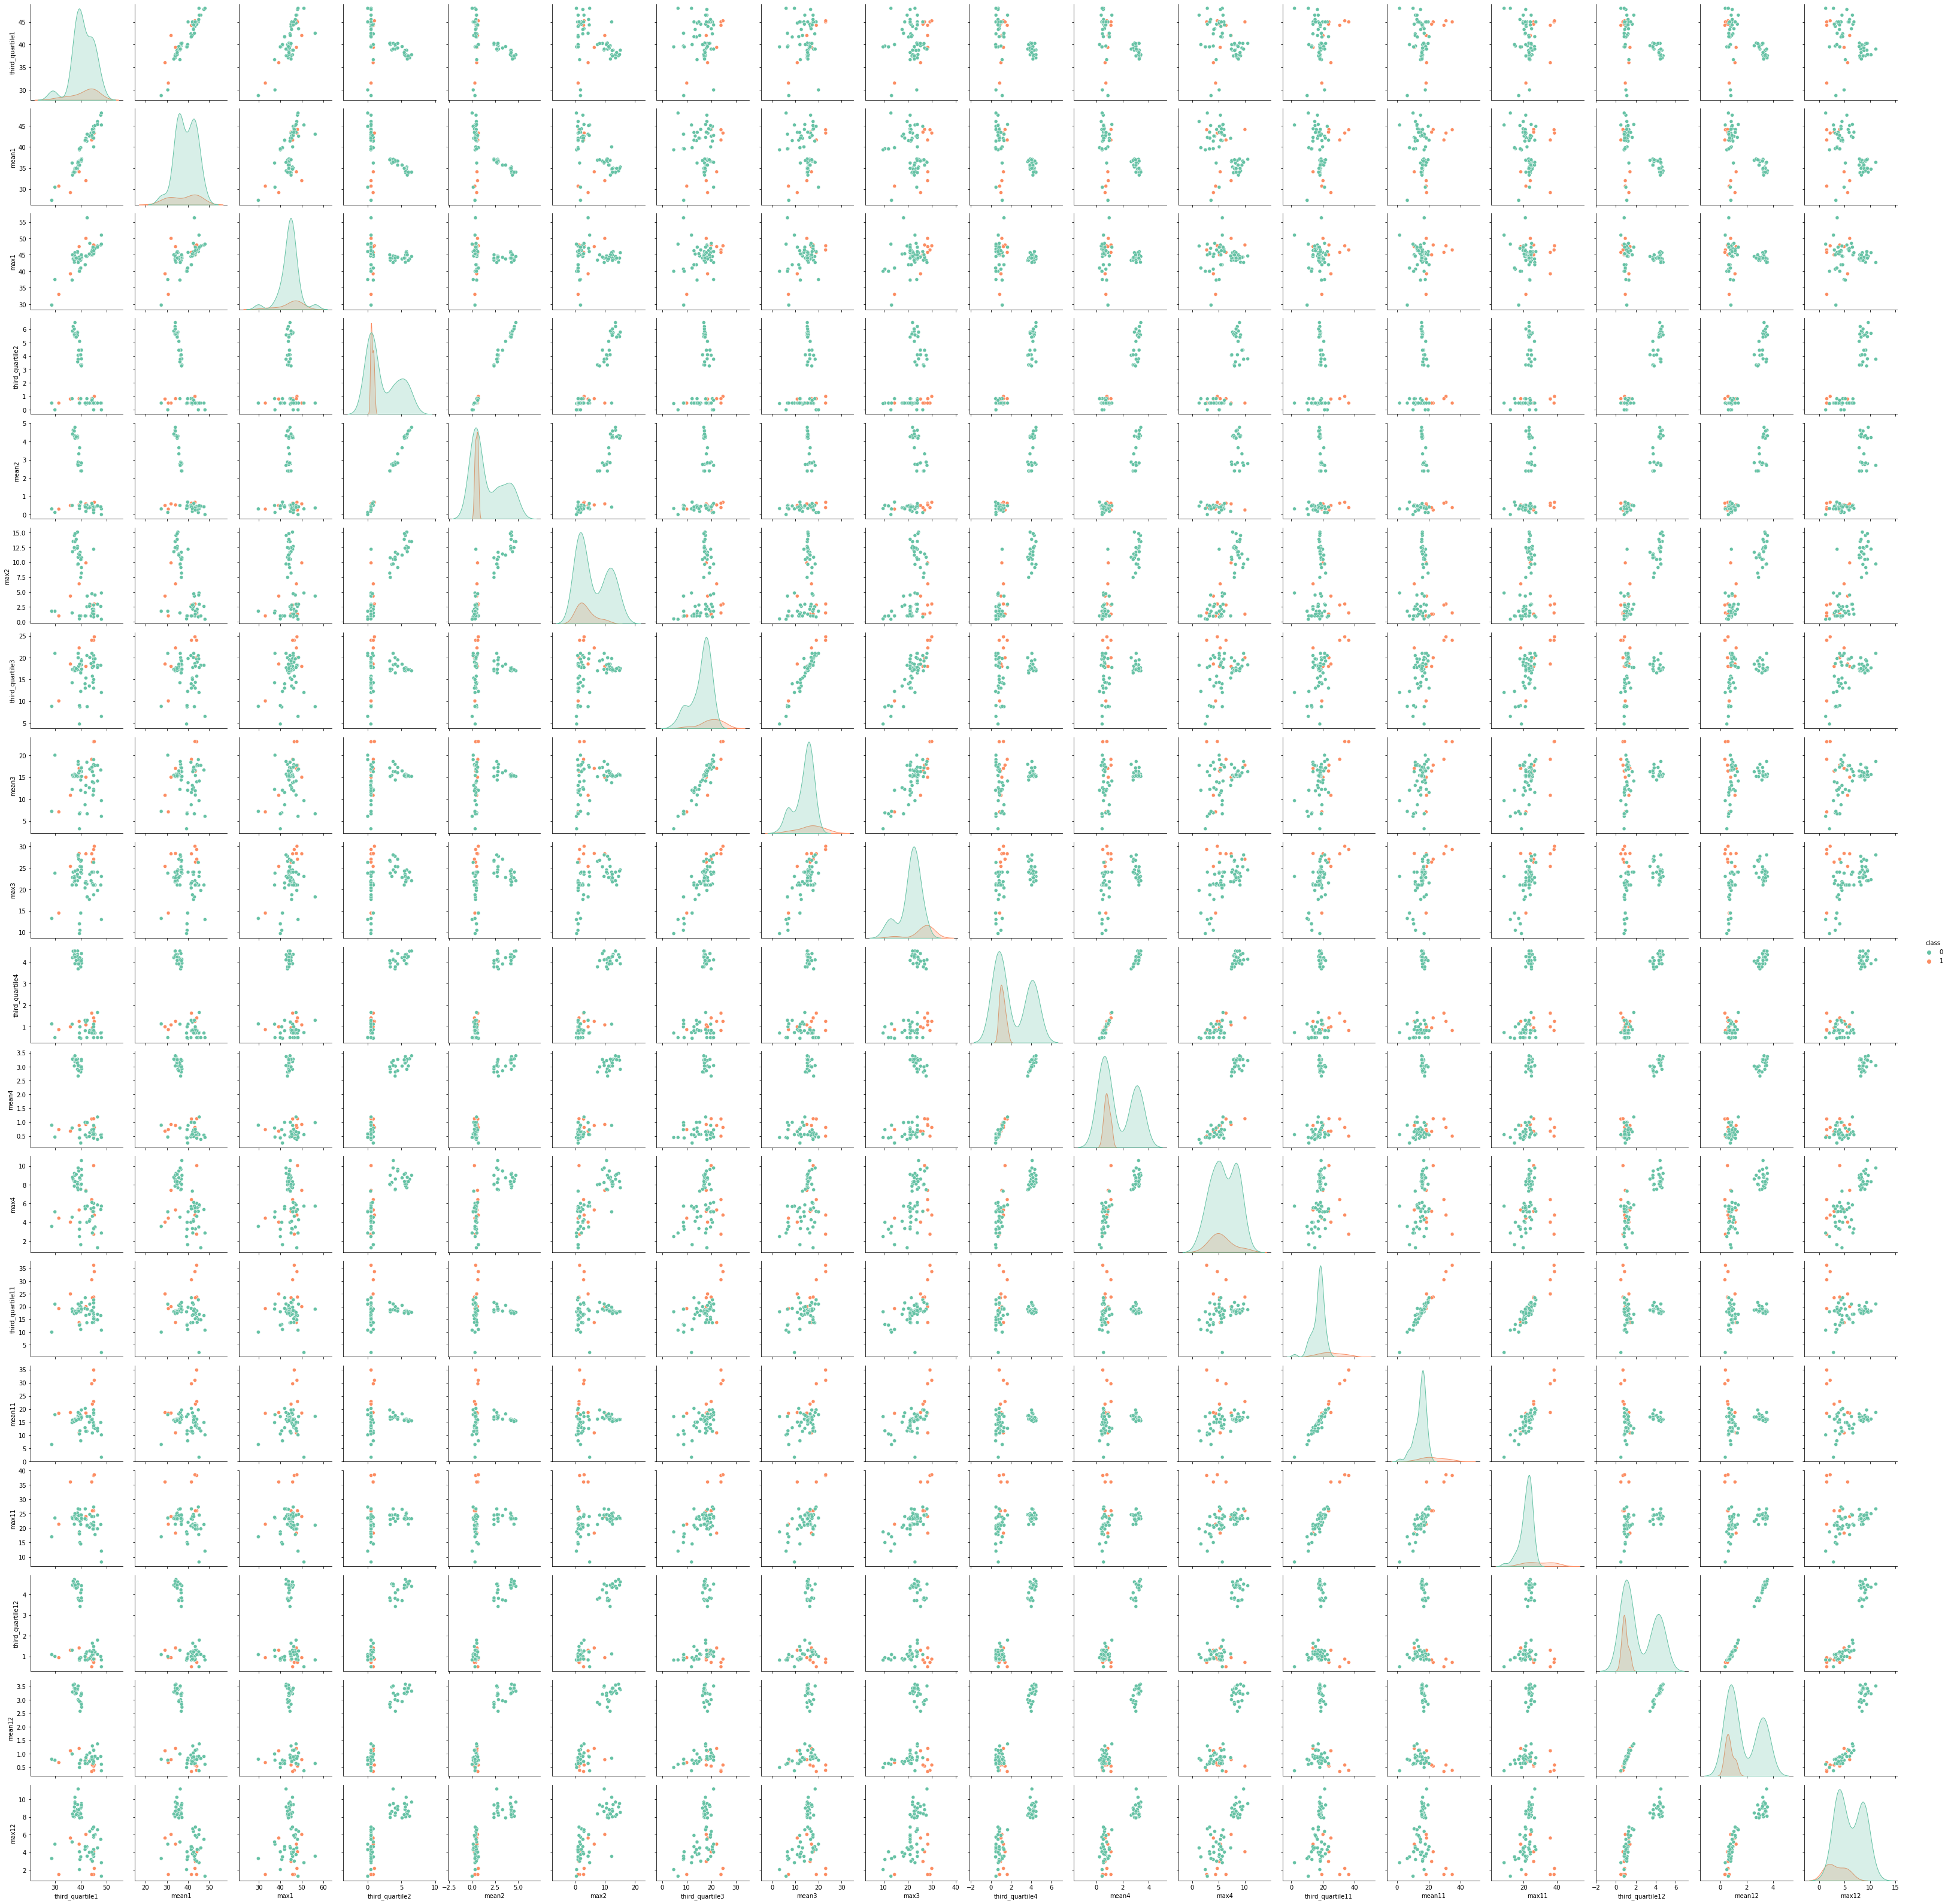

In [8]:
rlt2 = get_features_split_n(type='train', select_li=selected_features_list, N=2)
plot = sns.pairplot(data=rlt2, vars=['third_quartile1','mean1','max1','third_quartile2','mean2','max2',
'third_quartile3','mean3','max3','third_quartile4','mean4','max4',
'third_quartile11','mean11','max11','third_quartile12','mean12','max12'], kind='scatter', palette="Set2",hue='class')

# Difference between two plots:

more seperatable after breaking

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series
of approximately equal length and use logistic regression5
to solve the binary
classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of l and refit a logistic regression model using your pruned set of features.6
Alternatively, you can use backward selection using sklearn.feature selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(l, p), where p is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation
in this problem.7 Obviously, use the right way! Also, you may encounter the
problem of class imbalance, which may make some of your folds not having
any instances of the rare class. In such a case, you can use stratified cross
validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive
Feature Elimination, which is a backward selection algorithm, to logistic regression.

# The right way is to perform corss-validation in both feature selection step and model training step; the wrong way is to ignore cv in the first step. The reason is that the first step also see the labels of train data, and so is also a form of training.

In [9]:
from tqdm import tqdm
import warnings
from itertools import compress
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")
best_acc = 0
best_l = 0
for l in range(1, 11):
    data = get_features_split_n(type='train', select_li=selected_features_list, N=l)
    # data = get_features_split_n(type='train', N=l)
    y_train = data['class']
    x_train = data.drop(['class'], axis=1)
    # print(l, np.shape(x_train))
    logreg = LogisticRegression(n_jobs=-1, max_iter=1000)
    for j in range(1,len(x_train.columns)):
        rfe_res = RFE(estimator=logreg, n_features_to_select= j)
        rfe_res.fit(x_train, y_train)
        cv_score = cross_val_score(rfe_res, x_train, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_score)
        if mean_score > best_acc:
            best_acc = mean_score
            n_features = j
            best_l = l
            # print(rfe_res.support_, len(rfe_res.support_))
            best_features = list(compress(x_train.columns.tolist(),rfe_res.support_))
print("The best value of l is :" , best_l )
print("Optimal cv accuracy is :" , best_acc)
print("Optimal number of features is : " , n_features)
print("The Optimal features are : ", best_features)

The best value of l is : 1
Optimal cv accuracy is : 0.9857142857142858
Optimal number of features is :  5
The Optimal features are :  ['third_quartile1', 'mean3', 'mean5', 'third_quartile5', 'max5']


iv. Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression βi
’s as well
as the p-values associated with them.

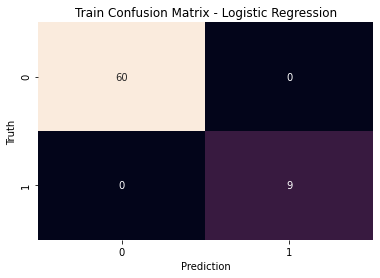

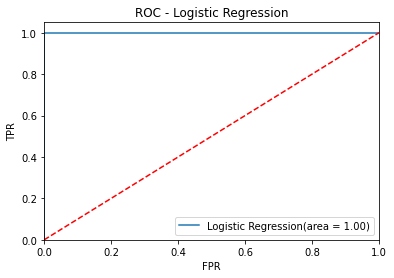

In [10]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt

def plot_confusion_and_roc(truth, pred, title, isTrain=False):
    conf_mat = confusion_matrix(truth, pred)
    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax)
    data_type = 'Train' if isTrain else 'Test'
    plt.title(data_type+' Confusion Matrix - '+title)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()
    roc_auc = roc_auc_score(truth, pred)
    fp_rate, tp_rate, thresholds = roc_curve(truth, pred)
    plt.figure()
    plt.plot(fp_rate, tp_rate, label=title+'(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC - '+title)
    plt.legend(loc="lower right")
    plt.show()

best_data = get_features_split_n(type='train', N=best_l)
Y_train = best_data['class']
X_train = best_data.drop(['class'], axis=1)
X_train = X_train[best_features]
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)

plot_confusion_and_roc(Y_train, Y_pred, 'Logistic Regression', isTrain=True)

In [11]:
logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit(method='bfgs')
result.summary()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                   1.000
Time:                        13:47:51   Log-Likelihood:            -2.1696e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 6.909e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
third_quartile1    -6.1003   4063.503     -0.002      0.999   -7970.420    7958.220
mean3              -4.5886   2004.373     -0.002      0.998   -3933.088    3923.911
mean5               9.5791    1.2e+04      0.001      0.999   -2.36e+04    2.36e+04
third_quartile5     0.7419   3858.338      0.000      1.000   -7561.462    7562.946
max5                4.1311   3279.899      0.001      0.999   -6424.354    6432.616
===================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

# In above output, coef_ column gives us Beta parameter values and p-values are given by P>|z| column

v. Test the classifier on the test set. Remember to break the time series in
your test set into the same number of time series into which you broke your
training set. Remember that the classifier has to be tested using the features
extracted from the test set. Compare the accuracy on the test set with the
cross-validation accuracy you obtained previously.

The Test Accuracy is : 1


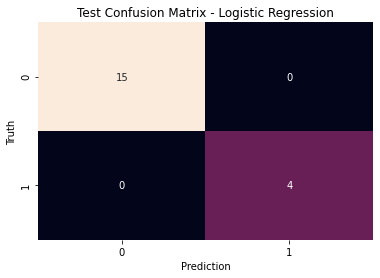

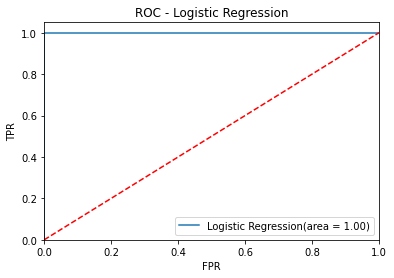

In [12]:
from sklearn import metrics
train_data = get_features_split_n(type='train', select_li=selected_features_list, N=best_l)
Y_train = train_data['class']
X_train = train_data.drop(['class'], axis=1)
X_train = X_train[best_features]

test_data = get_features_split_n(type='test', N=best_l)
Y_test = test_data['class']
X_test = test_data.drop(['class'], axis=1)
X_test = X_test[best_features]

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print("The Test Accuracy is : %d" %metrics.accuracy_score(Y_test, Y_pred))
plot_confusion_and_roc(Y_test, Y_pred, 'Logistic Regression', isTrain=False)

# test accuracy is 1, when cross-validation accuracy is 0.9857142857142858

vi. Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

# yes, statsmodel told us.
1. Even though we reduced the number of variables, the cases (train data) is only 69, which is few.
2. The accuracy of test set is high, so thoses variables are good predictors.
3. p-value is pretty large, and thus usual maximum likelihood estimates do not exist.
4. So, the result of the analysis is that the classification is good, but we have trouble in estimation.

vii. From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model.

# yes, bending/other classes are imbalanced, the first only has 9 data while other class has 60 data

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from itertools import compress
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

best_acc = 0
best_l = 0
for l in range(1, 11):
    data = get_features_split_n(type='train', select_li=selected_features_list, N=l)
    y_train = data['class']
    x_train = data.drop(['class'], axis=1)

    rus0 = RandomUnderSampler(sampling_strategy=0.333)
    x_sampled_train, y_sampled_train = rus0.fit_resample(x_train, y_train)
    # print(l, np.shape(x_train))
    logreg = LogisticRegression(n_jobs=-1, max_iter=1000)
    for j in range(1,len(x_sampled_train.columns)):
        rfe_res = RFE(estimator=logreg, n_features_to_select= j)
        rfe_res.fit(x_sampled_train, y_sampled_train)
        cv_score = cross_val_score(rfe_res, x_sampled_train, y_sampled_train, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_score)
        if mean_score > best_acc:
            best_acc = mean_score
            n_features = j
            best_l = l
            # print(rfe_res.support_, len(rfe_res.support_))
            best_features = list(compress(x_sampled_train.columns.tolist(),rfe_res.support_))
print("The best value of l is :" , best_l )
print("Optimal cv accuracy is :" , best_acc)
print("Optimal number of features is : " , n_features)
print("The Optimal features are : ", best_features)

The best value of l is : 2
Optimal cv accuracy is : 0.9714285714285715
Optimal number of features is :  5
The Optimal features are :  ['mean5', 'max5', 'max7', 'mean11', 'third_quartile11']


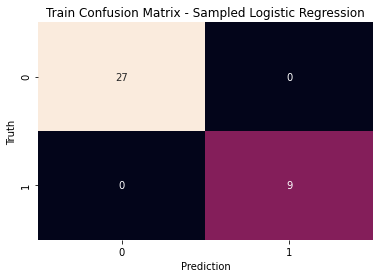

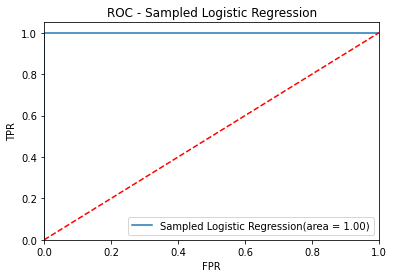

In [14]:
best_data = get_features_split_n(type='train', N=best_l)
Y_train = best_data['class']
X_train = best_data.drop(['class'], axis=1)
X_train = X_train[best_features]
X_train, Y_train = rus0.fit_resample(X_train, Y_train)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_train)
plot_confusion_and_roc(Y_train, Y_pred, 'Sampled Logistic Regression', isTrain=True)

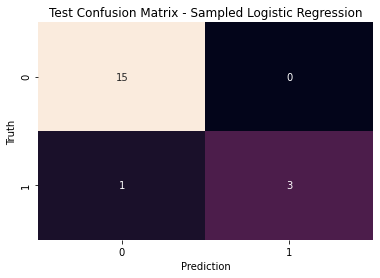

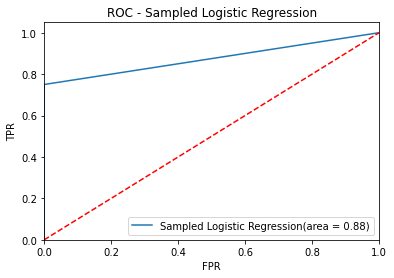

In [15]:
train_data = get_features_split_n(type='train', N=best_l)
Y_train = train_data['class']
X_train = train_data.drop(['class'], axis=1)
X_train = X_train[best_features]
X_train, Y_train = rus0.fit_resample(X_train, Y_train)

test_data = get_features_split_n(type='test', N=best_l)
Y_test = test_data['class']
X_test = test_data.drop(['class'], axis=1)
X_test = X_test[best_features]

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
plot_confusion_and_roc(Y_test, Y_pred, 'Sampled Logistic Regression')

(e) Binary Classification Using L1-penalized logistic regression

i. Repeat 1(d)iii using L1-penalized logistic regression,8
i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem,
you have to cross-validate for both l, the number of time series into which you
break each of your instances, and λ, the weight of L1 penalty in your logistic
regression objective function (or C, the budget). Packages usually perform
cross-validation for λ automatically.9

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold


best_cv_score = 0
best_l = 0
for l in tqdm(range(1, 21)):
    data = get_features_split_n(type='train', select_li=selected_features_list, N=l, normalize=True)
    y_train = data['class']
    x_train = data.drop(['class'], axis=1)

    x_sampled_train, y_sampled_train = rus0.fit_resample(x_train, y_train)
    lasso = LogisticRegressionCV(penalty = 'l1',cv=StratifiedKFold(5),solver='saga')
    lasso = lasso.fit(X_train, Y_train)
    cv_score = cross_val_score(lasso, X_train, Y_train, cv=StratifiedKFold(5), scoring='accuracy')
    mean_score = np.mean(cv_score)
    # print(lasso.Cs_, lasso.C_[0])
    if mean_score > best_cv_score:
        best_cv_score = mean_score
        best_l = l
        best_C = lasso.C_[0]
print("The best L-value for binary Log Reg L1 Penalty is : ", best_l )
print("The best C-value for binary Log Reg L1 Penalty : " ,best_C )
print("Optimal CV score for binary Log Reg L1 Penalty: " , best_cv_score)

100%|██████████| 20/20 [02:17<00:00,  6.86s/it]

The best L-value for binary Log Reg L1 Penalty is :  1
The best C-value for binary Log Reg L1 Penalty :  2.782559402207126
Optimal CV score for binary Log Reg L1 Penalty:  0.9142857142857143


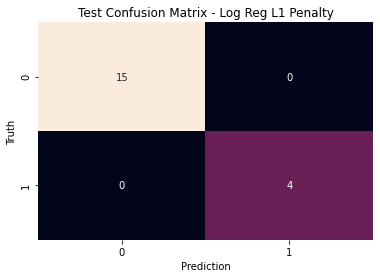

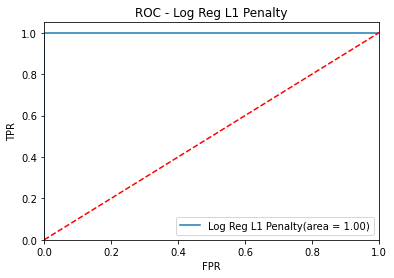

In [17]:
train_data = get_features_split_n(type='train', N=best_l)
Y_train = train_data['class']
X_train = train_data.drop(['class'], axis=1)
X_train, Y_train = rus0.fit_resample(X_train, Y_train)

test_data = get_features_split_n(type='test', N=best_l)
Y_test = test_data['class']
X_test = test_data.drop(['class'], axis=1)

lasso = LogisticRegression(penalty = 'l1', C=best_C, solver='saga')
lasso = lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
plot_confusion_and_roc(Y_test, Y_pred, 'Log Reg L1 Penalty')

ii. Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?

# both methods perform well on test set (except for the method using random under sampled; accuracy of test set of l1-penalized and back forward are both 1). L1-penalized is easier to implement without much loops and thus reducing computation load.

(f) Multi-class Classification (The Realistic Case)

i. Find the best l in the same way as you found it in 1(e)i to build an L1-
penalized multinomial regression model to classify all activities in your training set.10 Report your test error. Research how confusion matrices and ROC
curves are defined for multiclass classification and show them for this problem
if possible.11

In [18]:
def count_multi_classes_features_n(ans:pd.DataFrame, activity:str, id:int, is_bending:bool, n:int=1, select_li:list=[1]*7):
    # use select_li to select 3 time domain features: [mean, std, min, first_quatile, median, third_quartile, max]
    # [1,0,0,0,0,1,1]
    if activity=='bending2' and id==4: sep_=' '
    else:sep_=','
    df_ = pd.read_csv('../data/Homework 3 Data/AReM/'+activity+'/dataset'+str(id)+'.csv', comment='#', names=column_names, sep=sep_, index_col=False)
    df_.fillna(0, inplace=True)

    dflist = np.array_split(df_, n)
    
    i=1
    feature_row = pd.DataFrame(index=[0])
    for df in dflist:
        describe = df.describe()
        # print(describe)
        for attr, row in describe.iteritems():
            if attr=='time': continue
            if select_li[0]:
                mean = describe[attr][1]
                feature_row['mean'+str(i)] = mean
            if select_li[1]:
                std = describe[attr][2]
                feature_row['std'+str(i)] = std
            if select_li[2]:
                min_ = describe[attr][3]
                feature_row['min'+str(i)] = min_
            if select_li[3]:
                first_quartile = describe[attr][4]
                feature_row['first_quartile'+str(i)] = first_quartile
            if select_li[4]:
                median = describe[attr][5]
                feature_row['median'+str(i)] = median
            if select_li[5]:
                third_quartile = describe[attr][6]
                feature_row['third_quartile'+str(i)] = third_quartile
            if select_li[6]:
                max_ = describe[attr][7]
                feature_row['max'+str(i)] = max_
            feature_row['class'] = 'bending' if activity in ['bending1', 'bending2'] else activity
            i+=1
    ans = ans.append(feature_row, ignore_index=True)
        # print(feature_row)
    return ans


def get_multi_classes_features_split_n(type:str='all', N:int=1, normalize:bool=False, select_li:list=[1]*7):
    rlt_n = pd.DataFrame()
    if type=='all':
        for i in range(1, 8):
            rlt_n = count_multi_classes_features_n(rlt_n, activity='bending1', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 7):
            rlt_n = count_multi_classes_features_n(rlt_n, activity='bending2', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 16):
            for activity in activity_list2:
                rlt_n = count_multi_classes_features_n(rlt_n, activity=activity, id = i, is_bending=False,n=N, select_li=select_li)
    elif type=='test':
        for i in range(1, 3):
            rlt_n = count_multi_classes_features_n(rlt_n, activity='bending1', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 3):
            rlt_n = count_multi_classes_features_n(rlt_n, activity='bending2', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(1, 4):
            for activity in activity_list2:
                rlt_n = count_multi_classes_features_n(rlt_n, activity=activity, id = i, is_bending=False,n=N, select_li=select_li)
    elif type=='train':
        for i in range(3, 8):
            rlt_n = count_multi_classes_features_n(rlt_n, activity='bending1', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(3, 7):
            rlt_n = count_multi_classes_features_n(rlt_n, activity='bending2', id=i, is_bending=True,n=N, select_li=select_li)
        for i in range(3, 16):
            for activity in activity_list2:
                rlt_n = count_multi_classes_features_n(rlt_n, activity=activity, id = i, is_bending=False,n=N, select_li=select_li)
    
    if normalize:
        for item in list(rlt_n):
            if item=='class':
                break
            max_tmp=np.max(np.array(rlt_n[item]))
            min_tmp=np.min(np.array(rlt_n[item]))
            if (max_tmp!=min_tmp):
                rlt_n[item]=rlt_n[item].apply(lambda x:(x-min_tmp)/(max_tmp-min_tmp))

    return rlt_n

multi_classes_features = get_multi_classes_features_split_n()
# multi_classes_features
# multi_classes_features['class']

In [19]:
best_cv_score = 0
best_l = 0
for l in tqdm(range(1, 21)):
    data = get_multi_classes_features_split_n(type='train', select_li=selected_features_list, N=l, normalize=True)
    # print(data['class'].value_counts())
    y_train = data['class']
    x_train = data.drop(['class'], axis=1)

    # rus = RandomUnderSampler(sampling_strategy=0.333)
    # x_train, y_train = rus.fit_resample(x_train, y_train)

    multi_lasso = LogisticRegressionCV(penalty='l1',multi_class='multinomial',cv=3,solver='saga')
    multi_lasso = multi_lasso.fit(x_train, y_train)
    cv_score = cross_val_score(multi_lasso, x_train, y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > best_cv_score:
        best_cv_score = mean_score
        best_l = l
        best_C = multi_lasso.C_[0]
print("The best L-value Multiclass Log Reg L1 penalty is : ", best_l )
print("The best C-value Multiclass Log Reg L1 penalty is : " ,best_C )
print("Optimal CV score Multiclass Log Reg L1 penalty is: " , best_cv_score)

100%|██████████| 20/20 [03:02<00:00,  9.14s/it]

The best L-value Multiclass Log Reg L1 penalty is :  4
The best C-value Multiclass Log Reg L1 penalty is :  0.3593813663804626
Optimal CV score Multiclass Log Reg L1 penalty is:  0.8494444444444444


In [20]:
def multiclass_roc(y_true, y_pred):
    multi_class_labels = ['bending1', 'bending2','cycling', 'lying','sitting', 'standing', 'walking']
    lw=2
    fpr = tpr = roc_auc = dict()
    colors = ['purple','brown','blue','green','yellow','orange','red']
    for i in range(0,7):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=lw, label=f'ROC curve for {multi_class_labels[i]} (area= %0.2f)' %roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Test Error rate for multi-class Log Reg L1 penalty is :  0.10526315789473684


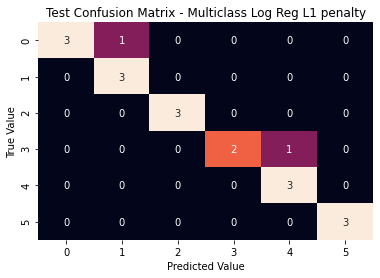

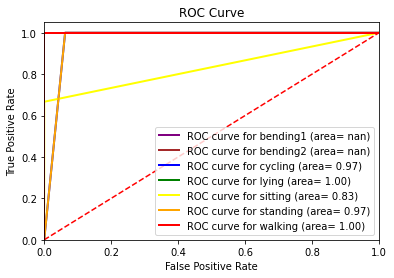

In [21]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize

multi_class_labels = ['bending1', 'bending2','cycling','lying', 'sitting', 'standing', 'walking']
train_data = get_multi_classes_features_split_n(type='train', N=best_l)
Y_train = train_data['class']
X_train = train_data.drop(['class'], axis=1)
rus=RandomUnderSampler()
X_train, Y_train = rus.fit_resample(X_train, Y_train)

test_data = get_multi_classes_features_split_n(type='test', N=best_l)
Y_test = test_data['class']
X_test = test_data.drop(['class'], axis=1)

multi_lasso = LogisticRegression(penalty = 'l1', C = best_C, multi_class='multinomial', solver='saga')
multi_lasso = multi_lasso.fit(X_train, Y_train)
Y_pred = multi_lasso.predict(X_test)

# print(np.shape(Y_test),np.shape(Y_pred))
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Test Error rate for multi-class Log Reg L1 penalty is : ", 1-accuracy )
conf_matrix = confusion_matrix(Y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, cbar= False, ax = ax)
plt.title('Test Confusion Matrix - Multiclass Log Reg L1 penalty')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
Y_test = label_binarize(Y_test, classes= multi_class_labels)
Y_pred = label_binarize(Y_pred, classes= multi_class_labels)
multiclass_roc(Y_test, Y_pred)

# In above plots, I show how confusion matrices and ROC curves are defined for multiclass classification

ii. Repeat 1(f)i using a Na¨ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

In [22]:
from sklearn.naive_bayes import GaussianNB

best_cv_score = 0
best_l = 0
for l in tqdm(range(1, 21)):
    data = get_multi_classes_features_split_n(type='train', select_li=selected_features_list, N=l, normalize=True)
    # print(data['class'].value_counts())
    y_train = data['class']
    x_train = data.drop(['class'], axis=1)

    # rus = RandomUnderSampler(sampling_strategy=0.333)
    # x_train, y_train = rus.fit_resample(x_train, y_train)

    nbgaussian = GaussianNB()
    nbgaussian = nbgaussian.fit(X_train, Y_train)
    cv_score = cross_val_score(nbgaussian, X_train, Y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > best_cv_score:
        best_cv_score = mean_score
        best_l = l
print("The best L-value for multiclass naive bayes (Gaussian Prior) is:", best_l)
print("Optimal CV score for multiclass naive bayes (Gaussian Prior) is:", best_cv_score)

100%|██████████| 20/20 [02:22<00:00,  7.11s/it]

The best L-value for multiclass naive bayes (Gaussian Prior) is: 1
Optimal CV score for multiclass naive bayes (Gaussian Prior) is: 0.6296296296296297


Test Error rate for GaussianNB is :  0.10526315789473684


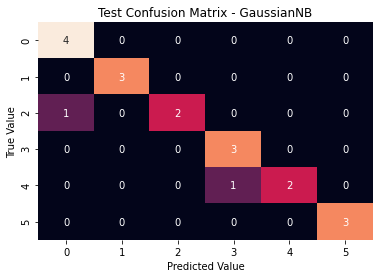

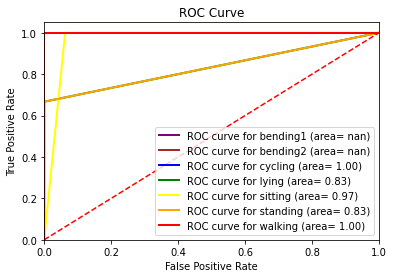

In [23]:
multi_class_labels = ['bending1', 'bending2','cycling','lying', 'sitting', 'standing', 'walking']
train_data = get_multi_classes_features_split_n(type='train', N=best_l)
Y_train = train_data['class']
X_train = train_data.drop(['class'], axis=1)
X_train, Y_train = rus.fit_resample(X_train, Y_train)

test_data = get_multi_classes_features_split_n(type='test', N=best_l)
Y_test = test_data['class']
X_test = test_data.drop(['class'], axis=1)

nbgaussian = GaussianNB()
nbgaussian = nbgaussian.fit(X_train, Y_train)
Y_pred = nbgaussian.predict(X_test)

# print(np.shape(Y_test),np.shape(Y_pred))
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Test Error rate for GaussianNB is : ", 1-accuracy )
conf_matrix = confusion_matrix(Y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, cbar= False, ax = ax)
plt.title('Test Confusion Matrix - GaussianNB')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
Y_test = label_binarize(Y_test, classes= multi_class_labels)
Y_pred = label_binarize(Y_pred, classes= multi_class_labels)
multiclass_roc(Y_test, Y_pred)

In [26]:
from sklearn.naive_bayes import MultinomialNB

best_cv_score = 0
best_l = 0
for l in tqdm(range(1, 21)):
    data = get_multi_classes_features_split_n(type='train', select_li=selected_features_list, N=l, normalize=True)
    # print(data['class'].value_counts())
    y_train = data['class']
    x_train = data.drop(['class'], axis=1)

    # rus = RandomUnderSampler(sampling_strategy=0.333)
    # x_train, y_train = rus.fit_resample(x_train, y_train)

    nbmultinomial = MultinomialNB()
    nbmultinomial = nbmultinomial.fit(X_train, Y_train)
    cv_score = cross_val_score(nbmultinomial, X_train, Y_train, cv=3, scoring='accuracy')
    mean_score = np.mean(cv_score)
    if mean_score > best_cv_score:
        best_cv_score = mean_score
        best_l = l
print("The best L-value for multiclass naive bayes (Multinomial Prior) is:", best_l)
print("Optimal CV score for multiclass naive bayes (Multinomial Prior) is:", best_cv_score)

100%|██████████| 20/20 [02:27<00:00,  7.36s/it]

The best L-value for multiclass naive bayes (Multinomial Prior) is: 1
Optimal CV score for multiclass naive bayes (Multinomial Prior) is: 0.7407407407407408


Test Error rate for multiclass naive bayes(Multinomial Prior) is :  0.10526315789473684


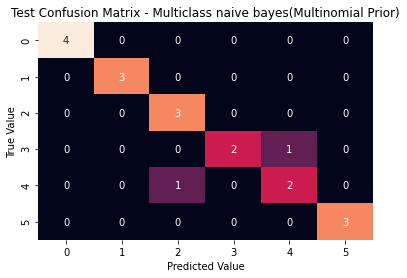

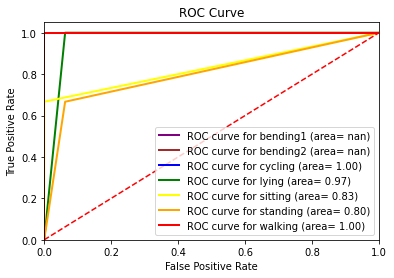

In [27]:
train_data = get_multi_classes_features_split_n(type='train', N=best_l)
Y_train = train_data['class']
X_train = train_data.drop(['class'], axis=1)
X_train, Y_train = rus.fit_resample(X_train, Y_train)

test_data = get_multi_classes_features_split_n(type='test', N=best_l)
Y_test = test_data['class']
X_test = test_data.drop(['class'], axis=1)

nbmultinomial = MultinomialNB()
nbmultinomial = nbmultinomial.fit(X_train, Y_train)
Y_pred = nbmultinomial.predict(X_test)

# print(np.shape(Y_test),np.shape(Y_pred))
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Test Error rate for multiclass naive bayes(Multinomial Prior) is : ", 1-accuracy )
conf_matrix = confusion_matrix(Y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, cbar= False, ax = ax)
plt.title('Test Confusion Matrix - Multiclass naive bayes(Multinomial Prior)')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()
Y_test = label_binarize(Y_test, classes= multi_class_labels)
Y_pred = label_binarize(Y_pred, classes= multi_class_labels)
multiclass_roc(Y_test, Y_pred)

iii. Which method is better for multi-class classification in this problem?

# All methods perfrom well in test set (all of them get a 0.105 test error), naive bayes (Gaussian Prior) performs not so good in cross validation.

2. ISLR 3.7.4

(a) I would expect the polynomial regression to have a lower training RSS
than the linear regression because it could make a tighter fit against data that
matched with a wider irreducible error (Var(epsilon)).

(b) Converse to (a), I would expect the polynomial regression to have a higher
test RSS as the overfit from training would have more error than the linear
regression.

(c) Polynomial regression has lower train RSS than the linear fit because of
higher flexibility: no matter what the underlying true relationshop is the
more flexible model will closer follow points and reduce train RSS.
An example of this beahvior is shown on Figure~2.9 from Chapter 2.

(d) There is not enough information to tell which test RSS would be lower
for either regression given the problem statement is defined as not knowing
"how far it is from linear". If it is closer to linear than cubic, the linear
regression test RSS could be lower than the cubic regression test RSS.
Or, if it is closer to cubic than linear, the cubic regression test RSS
could be lower than the linear regression test RSS. It is dues to
bias-variance tradeoff: it is not clear what level of flexibility will
fit data better.

3. ISLR, 4.8.3

answer was uploaded in: ../3ans.png, ../7ans.png

if the picture failed to show in github, please go to the location and open the png file.

![avatar](../3ans.png)

4. ISLR 4.8.7

![avatar](../7ans.png)